### Data Understanding and Preparation

In [197]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [198]:
#Uploading the data
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [199]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [200]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [201]:
telecom_data.shape

(99999, 226)

### Imputing

In [202]:
#Imputing NaN values with 0 for total recharge amounnt of data and voice calls
telecom_data['av_rech_amt_data_6'].fillna(0,inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0,inplace=True)
telecom_data['total_rech_amt_7'].fillna(0,inplace=True)
telecom_data['total_rech_amt_6'].fillna(0,inplace=True)

In [203]:
#Imputing NaN values with 0 for total no of recharges for data
telecom_data['total_rech_data_7'].fillna(0,inplace=True)
telecom_data['total_rech_data_6'].fillna(0,inplace=True)

### Feature Engineering and filtering High value customers

In [204]:
#Step1 : Deriving new metrics
#Calculating total recharge amount for data
telecom_data['total_rech_data_amt_7'] = telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']
telecom_data['total_rech_data_amt_6'] = telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']

In [205]:
#Step2 : Filtering high value customers
#Calculating average amount of total recharge done for both Jun(6) and July(7)
telecom_data['avg_rech_6_7'] = (telecom_data['total_rech_data_amt_7'] + telecom_data['total_rech_data_amt_6'] + telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/4

In [206]:
#Inspecting average recharge amount
telecom_data['avg_rech_6_7'].head()

0    279.50
1    153.00
2    120.75
3    135.00
4    150.50
Name: avg_rech_6_7, dtype: float64

In [207]:
#Filtering out high value customers who have done average recharge greater than or equal to 70th percentile of average amount of June and July
telecom_data_high_cust = telecom_data[(telecom_data['avg_rech_6_7'] >= round(np.percentile(telecom_data['avg_rech_6_7'],70),2))]

In [208]:
#Inspecting final data frame of high value customers
telecom_data_high_cust.shape

#We got total 30001 high value customers

(30001, 229)

In [209]:
#Step3 : Tag churners and remove attributes of the churn phase

#Inspecting null values for total incoming for month of August
telecom_data_high_cust['total_ic_mou_9'].isna().sum()

0

In [210]:
#Inspecting null values for total outgoing for month of August
telecom_data_high_cust['total_og_mou_9'].isna().sum()

0

In [211]:
#Inspecting null values for usage of 2g mobile data for month of August
telecom_data_high_cust['vol_2g_mb_9'].isna().sum()

0

In [212]:
#Inspecting null values for usage of 3g mobile data for month of August
telecom_data_high_cust['vol_3g_mb_9'].isna().sum()

0

In [213]:
#Creating a custom function to tag customers as churn =1/0 based on certain criteria
def isChurn(x):
    if x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0:
        return 1
    else:
        return 0

In [214]:
#Tagging customers as churn/Not churn by applying above custom function
telecom_data_high_cust['churn'] = telecom_data_high_cust.apply(isChurn,axis=1)

In [215]:
#Inspecting the total count of churned and not churned customers
print((telecom_data_high_cust['churn'].sum())/len(telecom_data_high_cust.index))
telecom_data_high_cust['churn'].value_counts()

#We can conclude that we have total 2.4k churned customers.

0.08136395453484883


0    27560
1     2441
Name: churn, dtype: int64

#### There is clearly a class imbalance which could effect our model

In [216]:
#Removing attrbiutes from final data frame for churn phase( with _9 suffix)
telecom_data_high_cust.drop([col for col in telecom_data_high_cust.columns if "_9" in col], axis=1, inplace=True)

In [217]:
telecom_data_high_cust.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_data_amt_7', 'total_rech_data_amt_6',
       'avg_rech_6_7', 'churn'],
      dtype='object', length=176)

In [218]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)

night_pck_user_8            47.0
fb_user_8                   47.0
count_rech_2g_8             47.0
count_rech_3g_8             47.0
total_rech_data_8           47.0
av_rech_amt_data_8          47.0
date_of_last_rech_data_8    47.0
arpu_3g_8                   47.0
arpu_2g_8                   47.0
max_rech_data_8             47.0
arpu_2g_6                   44.0
count_rech_2g_6             44.0
count_rech_3g_6             44.0
max_rech_data_6             44.0
date_of_last_rech_data_6    44.0
arpu_3g_6                   44.0
fb_user_6                   44.0
night_pck_user_6            44.0
night_pck_user_7            43.0
count_rech_2g_7             43.0
count_rech_3g_7             43.0
date_of_last_rech_data_7    43.0
arpu_3g_7                   43.0
arpu_2g_7                   43.0
fb_user_7                   43.0
max_rech_data_7             43.0
std_og_t2t_mou_8             4.0
loc_ic_mou_8                 4.0
std_ic_t2t_mou_8             4.0
isd_og_mou_8                 4.0
          

In [219]:
#Removing date columns as they hold any relevance in predicting the churn
telecom_data_high_cust.drop([col for col in telecom_data_high_cust.columns if "date" in col], axis=1, inplace=True)

In [220]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)

count_rech_3g_8          47.0
max_rech_data_8          47.0
av_rech_amt_data_8       47.0
count_rech_2g_8          47.0
total_rech_data_8        47.0
night_pck_user_8         47.0
arpu_3g_8                47.0
fb_user_8                47.0
arpu_2g_8                47.0
max_rech_data_6          44.0
arpu_2g_6                44.0
night_pck_user_6         44.0
fb_user_6                44.0
arpu_3g_6                44.0
count_rech_3g_6          44.0
count_rech_2g_6          44.0
arpu_2g_7                43.0
count_rech_2g_7          43.0
fb_user_7                43.0
night_pck_user_7         43.0
arpu_3g_7                43.0
max_rech_data_7          43.0
count_rech_3g_7          43.0
loc_og_mou_8              4.0
loc_og_t2f_mou_8          4.0
loc_ic_mou_8              4.0
loc_og_t2c_mou_8          4.0
std_og_mou_8              4.0
std_ic_t2t_mou_8          4.0
std_og_t2t_mou_8          4.0
                         ... 
jun_vbc_3g                0.0
sep_vbc_3g                0.0
total_rech

In [221]:
# Removing the columns with more than 30% missing data
telecom_data_high_cust=telecom_data_high_cust.loc[:,round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)<30]

In [222]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)>0

loc_ic_t2f_mou_8          True
std_ic_t2f_mou_8          True
std_og_t2t_mou_8          True
loc_og_t2c_mou_8          True
loc_ic_mou_8              True
loc_og_t2f_mou_8          True
std_ic_t2m_mou_8          True
std_ic_mou_8              True
loc_og_t2m_mou_8          True
std_og_t2m_mou_8          True
loc_og_t2t_mou_8          True
loc_ic_t2m_mou_8          True
ic_others_8               True
roam_og_mou_8             True
std_ic_t2t_mou_8          True
roam_ic_mou_8             True
loc_ic_t2t_mou_8          True
isd_ic_mou_8              True
og_others_8               True
std_og_t2f_mou_8          True
isd_og_mou_8              True
std_ic_t2o_mou_8          True
spl_og_mou_8              True
offnet_mou_8              True
spl_ic_mou_8              True
onnet_mou_8               True
std_og_mou_8              True
std_og_t2c_mou_8          True
loc_og_mou_8              True
std_ic_t2f_mou_6          True
                         ...  
jun_vbc_3g               False
sep_vbc_

In [223]:
round(100*telecom_data_high_cust.loc[:,telecom_data_high_cust.isnull().any()].isnull().sum()/len(telecom_data_high_cust.index),2).sort_values(ascending=False)

ic_others_8         3.91
std_og_t2t_mou_8    3.91
loc_ic_t2m_mou_8    3.91
loc_ic_t2t_mou_8    3.91
og_others_8         3.91
spl_og_mou_8        3.91
isd_og_mou_8        3.91
std_og_t2c_mou_8    3.91
std_og_t2f_mou_8    3.91
std_og_t2m_mou_8    3.91
loc_og_mou_8        3.91
loc_ic_mou_8        3.91
loc_og_t2c_mou_8    3.91
loc_og_t2f_mou_8    3.91
loc_og_t2m_mou_8    3.91
loc_og_t2t_mou_8    3.91
roam_og_mou_8       3.91
roam_ic_mou_8       3.91
offnet_mou_8        3.91
onnet_mou_8         3.91
loc_ic_t2f_mou_8    3.91
std_og_mou_8        3.91
std_ic_t2m_mou_8    3.91
spl_ic_mou_8        3.91
std_ic_t2t_mou_8    3.91
std_ic_t2f_mou_8    3.91
std_ic_mou_8        3.91
isd_ic_mou_8        3.91
std_ic_t2o_mou_8    3.91
std_ic_t2o_mou_6    1.82
                    ... 
loc_og_t2t_mou_7    1.79
loc_og_t2m_mou_7    1.79
spl_ic_mou_7        1.79
onnet_mou_7         1.79
roam_ic_mou_7       1.79
isd_ic_mou_7        1.79
loc_og_t2f_mou_7    1.79
std_ic_t2t_mou_7    1.79
loc_og_t2c_mou_7    1.79


In [224]:
# Computing percentage of rows for various numbers of missing values
num=[5,10,15,20,25,30,35,40,45,50]
for i in num:
    print(str(100*(len(telecom_data_high_cust[telecom_data_high_cust.isnull().sum(axis=1) > i].index) / len(telecom_data_high_cust.index)))+' for '+str(i))

4.989833672210926 for 5
4.989833672210926 for 10
4.989833672210926 for 15
4.989833672210926 for 20
4.989833672210926 for 25
1.6832772240925302 for 30
1.6832772240925302 for 35
1.6832772240925302 for 40
1.6832772240925302 for 45
1.6832772240925302 for 50


In [225]:
# look at the summary again
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index)), 2).sort_values(ascending=False)

isd_ic_mou_8             3.91
std_og_t2t_mou_8         3.91
std_ic_t2o_mou_8         3.91
loc_og_t2f_mou_8         3.91
std_ic_t2f_mou_8         3.91
loc_og_t2m_mou_8         3.91
loc_og_mou_8             3.91
std_ic_t2m_mou_8         3.91
loc_og_t2t_mou_8         3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
roam_og_mou_8            3.91
loc_ic_mou_8             3.91
roam_ic_mou_8            3.91
loc_og_t2c_mou_8         3.91
loc_ic_t2f_mou_8         3.91
offnet_mou_8             3.91
loc_ic_t2m_mou_8         3.91
spl_ic_mou_8             3.91
onnet_mou_8              3.91
loc_ic_t2t_mou_8         3.91
std_og_t2c_mou_8         3.91
std_og_t2m_mou_8         3.91
og_others_8              3.91
std_og_mou_8             3.91
spl_og_mou_8             3.91
ic_others_8              3.91
isd_og_mou_8             3.91
std_ic_mou_8             3.91
spl_ic_mou_6             1.82
                         ... 
jun_vbc_3g               0.00
sep_vbc_3g               0.00
total_rech

In [226]:
#Imputing all NAN's in data frame with 0 since only number columns are left now
telecom_data_high_cust.fillna(0,inplace=True)

No missing values are left in the data and we are have retained 147 columns

In [227]:
telecom_data_high_cust.nunique().sort_values(ascending=True)

circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
std_ic_t2o_mou_8         1
std_ic_t2o_mou_7         1
std_ic_t2o_mou_6         1
std_og_t2c_mou_8         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
churn                    2
monthly_2g_6             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_8            12
monthly_3g_6            12
monthly_3g_7            15
sachet_3g_6             25
sachet_3g_7             27
sachet_3g_8             29
sachet_2g_6             31
sachet_2g_8             34
sachet_2g_7             35
total_rech_data_6       38
total_rech_data_7       43
spl_ic_mou_6            78
spl_ic_mou_8            80
spl_ic_mou_7            92
total_rech_num_8        96
total_rech_num_7       101
                     ...  
loc_ic_t2m_mou_8     15122
loc_og_t2m_mou_8     15130
loc_ic_t2m_mou_6     15461
loc_ic_t2m_mou_7     15547
loc_og_t2m_mou_6     15625
loc_og_t2m_mou_7     15674
o

In [228]:
for col in telecom_data_high_cust.columns:
    if len(telecom_data_high_cust[col].unique()) == 1:
        telecom_data_high_cust.drop(col,inplace=True,axis=1)
        print (col)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [229]:
telecom_data_high_cust.drop(['mobile_number'], axis =1, inplace = True)

In [230]:
#Checking for class imbalance again
print((telecom_data_high_cust['churn'].sum())/len(telecom_data_high_cust.index))
telecom_data_high_cust['churn'].value_counts()


0.08136395453484883


0    27560
1     2441
Name: churn, dtype: int64

#### Handeling class imbalance
Class Imbalance is handled by using the sklearn feature by specifying the class_weight as 'balanced'

Check the logistic regression model

### EDA

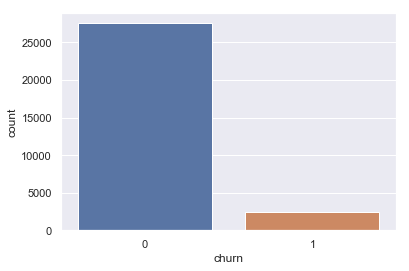

In [231]:
#Inspecting the count of churns and not churns
sns.countplot(telecom_data_high_cust['churn'])

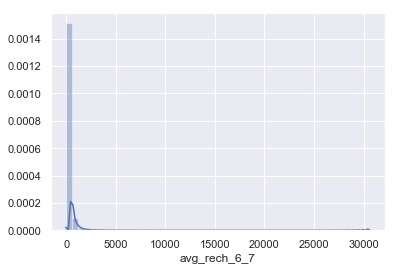

In [232]:
# simple density plot
sns.distplot(telecom_data['avg_rech_6_7'])
plt.show()

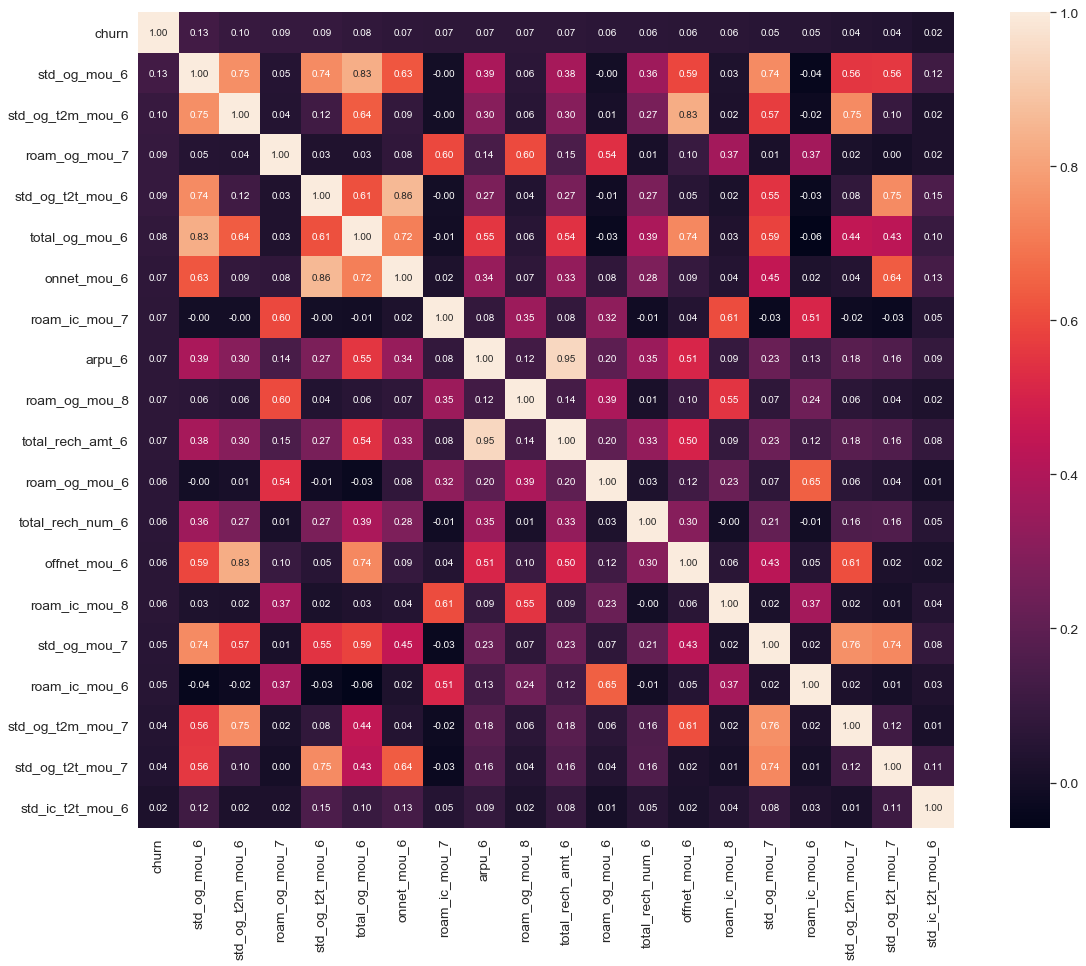

In [233]:
#Churn correlation matrix
corrmat = telecom_data_high_cust.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(telecom_data_high_cust[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(20,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

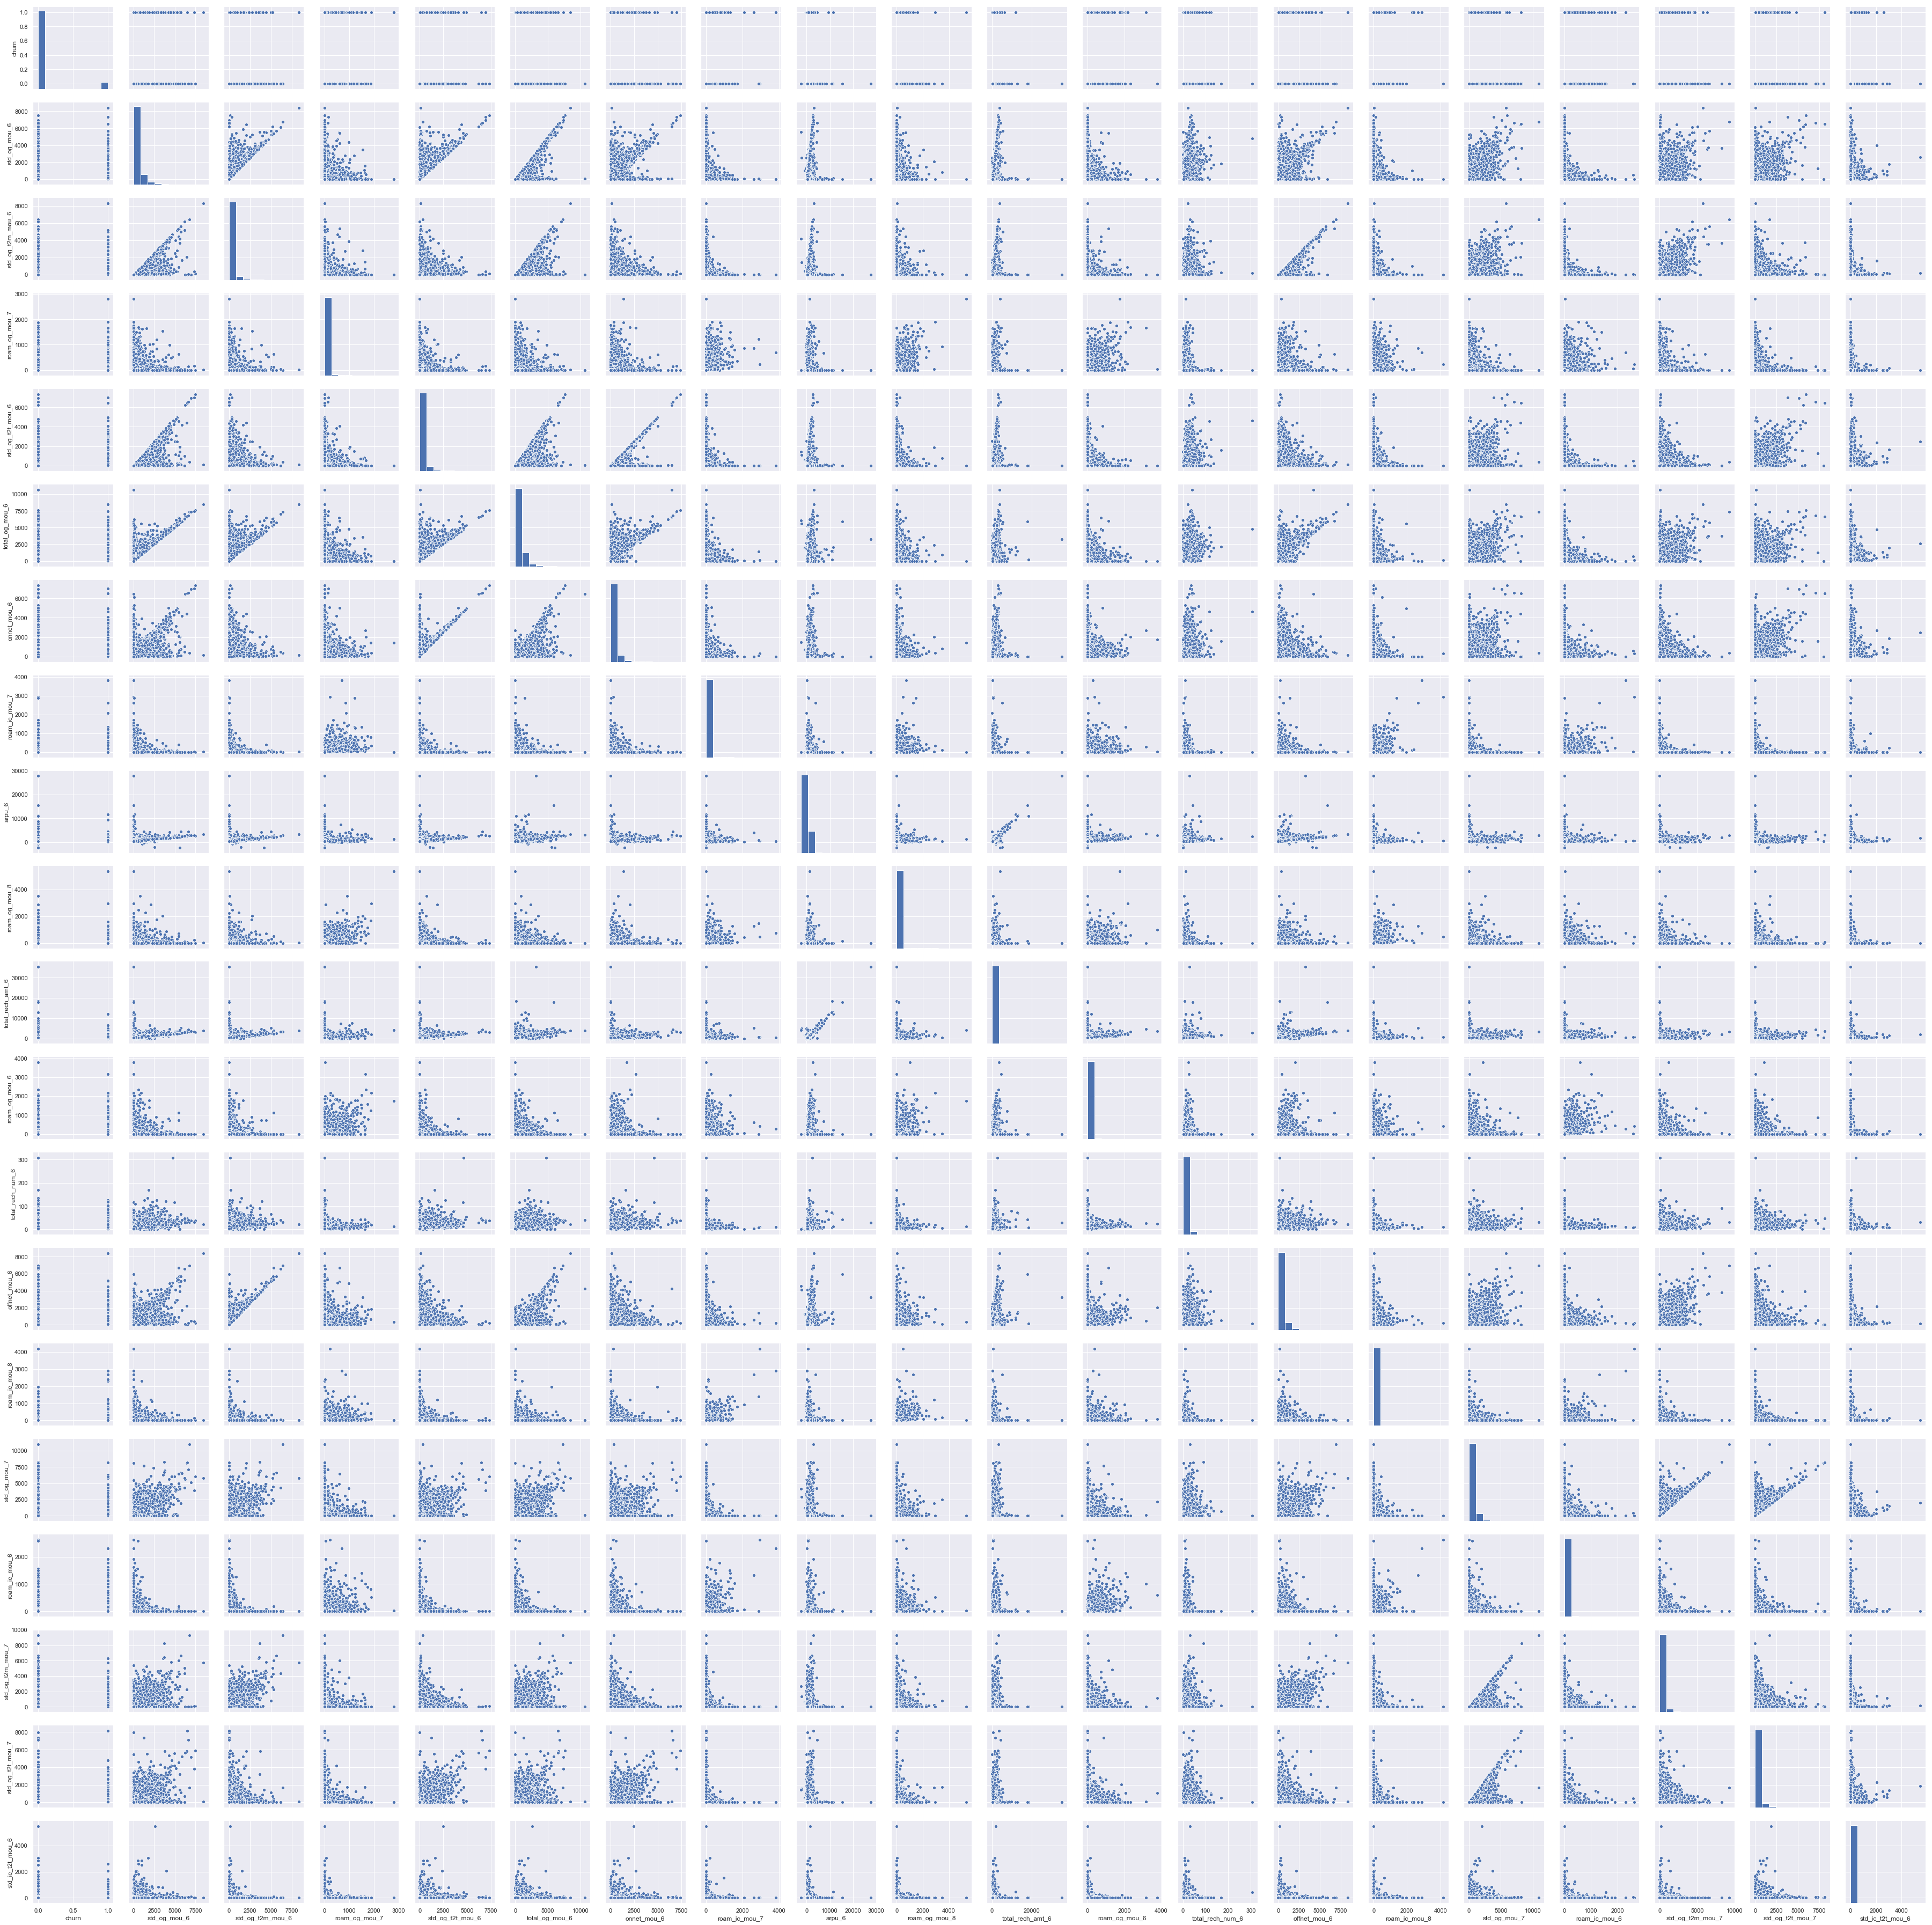

In [234]:
sns.set()
sns.pairplot(telecom_data_high_cust[cols], size = 2.5)
plt.show();

**All relevant visualizations of continuous variable have been made**

### Identifying Important predictors

In [235]:
X=telecom_data_high_cust.drop(['churn'],axis=1)
y=telecom_data_high_cust['churn']

In [236]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_7,total_rech_data_amt_6,avg_rech_6_7
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,279.5
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,592.5
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,0.00,354.0,0.0,348.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,320.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,1,604,40.45,51.86,0.00,0.00,712.0,0.0,291.5


In [237]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [238]:
X_train.shape

(21000, 132)

In [239]:
# Using ExtraTreesClassifier to compare the importance of various parameters
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(class_weight="balanced")
model.fit(X_train, y_train)
immportance_arr = model.feature_importances_

In [240]:
immportance_arr

array([0.00848709, 0.00670402, 0.01089843, 0.00589969, 0.00730189,
       0.02607563, 0.00619044, 0.00555708, 0.01329415, 0.00298838,
       0.00364853, 0.00820686, 0.00482874, 0.00392727, 0.01044156,
       0.00547765, 0.00492549, 0.01282962, 0.00572141, 0.01133052,
       0.01676403, 0.00404632, 0.00439869, 0.00388762, 0.00382389,
       0.00388089, 0.00479661, 0.00459585, 0.02152096, 0.01435764,
       0.00663329, 0.00771233, 0.00938747, 0.00751851, 0.00604401,
       0.01540904, 0.00218719, 0.00221297, 0.00188531, 0.01056956,
       0.00944435, 0.01041199, 0.00200085, 0.00288227, 0.00176457,
       0.00475732, 0.00495014, 0.00583649, 0.00441164, 0.0004093 ,
       0.00011503, 0.01157577, 0.00736027, 0.01839083, 0.00481361,
       0.00600738, 0.00742268, 0.00739684, 0.00802345, 0.03302945,
       0.00314709, 0.00422831, 0.00606922, 0.0069672 , 0.00642035,
       0.0602557 , 0.00328532, 0.00447649, 0.00483562, 0.00347781,
       0.00388012, 0.00606534, 0.00232702, 0.0020244 , 0.00303

In [241]:
imp_col = pd.DataFrame(immportance_arr)

In [242]:
imp_col['Features'] = X_train.columns

In [243]:
imp_col.columns = ['Importance','Feature Name']

In [244]:
imp_col = imp_col.sort_values(by=['Importance'],ascending=False)

In [245]:
#Arranged in the order of importance
imp_col.reset_index()

,index,Importance,Feature Name
0,65,0.060256,loc_ic_mou_8
1,92,0.035058,total_rech_num_8
2,59,0.033029,loc_ic_t2m_mou_8
3,117,0.026772,sachet_2g_8
4,5,0.026076,onnet_mou_8
5,95,0.023613,total_rech_amt_8
6,28,0.021521,loc_og_mou_7
7,101,0.019400,last_day_rch_amt_8
8,53,0.018391,total_og_mou_8
9,20,0.016764,loc_og_t2m_mou_8


### Performing PCA on train data set

In [246]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [247]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [248]:
pca.components_

array([[-1.52571055e-02, -1.10956271e-02, -1.46108315e-02, ...,
         5.59526376e-01,  4.14274034e-01,  2.34284816e-01],
       [ 1.65297640e-01,  1.99649899e-01,  1.97720255e-01, ...,
         2.03466393e-01,  1.15751227e-01,  1.88836549e-01],
       [ 1.35401294e-01,  1.25273997e-01,  1.65921627e-01, ...,
        -3.62407893e-01, -1.69399095e-01, -5.47629942e-02],
       ...,
       [ 0.00000000e+00, -2.14499890e-18,  5.19573779e-18, ...,
         4.66922564e-03,  4.66922564e-03, -1.86769026e-02],
       [-0.00000000e+00, -3.57718609e-18, -3.07206498e-18, ...,
        -1.63453277e-04, -1.63453277e-04,  6.53813106e-04],
       [-0.00000000e+00, -3.68972629e-17,  6.39408796e-16, ...,
         2.23557983e-01,  2.23557983e-01, -8.94231931e-01]])

In [249]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.015257,0.165298,arpu_6
1,-0.011096,0.199650,arpu_7
2,-0.014611,0.197720,arpu_8
3,-0.064991,0.115659,onnet_mou_6
4,-0.072272,0.139741,onnet_mou_7


In [250]:
pca.explained_variance_ratio_

array([2.63553513e-01, 1.90027237e-01, 8.79770515e-02, 6.91540199e-02,
       5.26056275e-02, 4.80019790e-02, 4.25970908e-02, 4.05264914e-02,
       3.46694565e-02, 2.31871934e-02, 1.70505672e-02, 1.55469254e-02,
       1.38700300e-02, 1.17925061e-02, 1.02402034e-02, 8.64705995e-03,
       7.09793749e-03, 5.90942303e-03, 5.42293176e-03, 4.34940104e-03,
       4.30627508e-03, 3.45558433e-03, 3.26548164e-03, 3.16676833e-03,
       3.03923402e-03, 2.90524621e-03, 2.59733875e-03, 2.50935687e-03,
       2.03207918e-03, 1.85556267e-03, 1.74928422e-03, 1.64473961e-03,
       1.36028348e-03, 1.27297072e-03, 1.16814522e-03, 9.33300523e-04,
       8.24727567e-04, 7.86096684e-04, 7.34509451e-04, 5.97500352e-04,
       5.91381955e-04, 5.50416103e-04, 5.16360072e-04, 5.11434873e-04,
       4.79138460e-04, 4.72027693e-04, 4.37369026e-04, 4.04448036e-04,
       3.49812734e-04, 3.46946669e-04, 3.33536613e-04, 2.94572886e-04,
       2.90592342e-04, 2.79688221e-04, 2.52363762e-04, 1.98173912e-04,
      

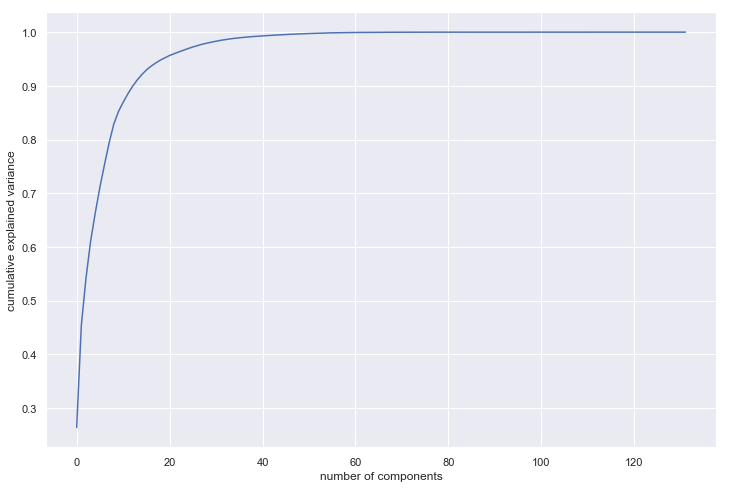

In [251]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We'll choose 20 components for modelling as it shows 90% of data vriance which is good.

In [252]:
#Using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [253]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 20)

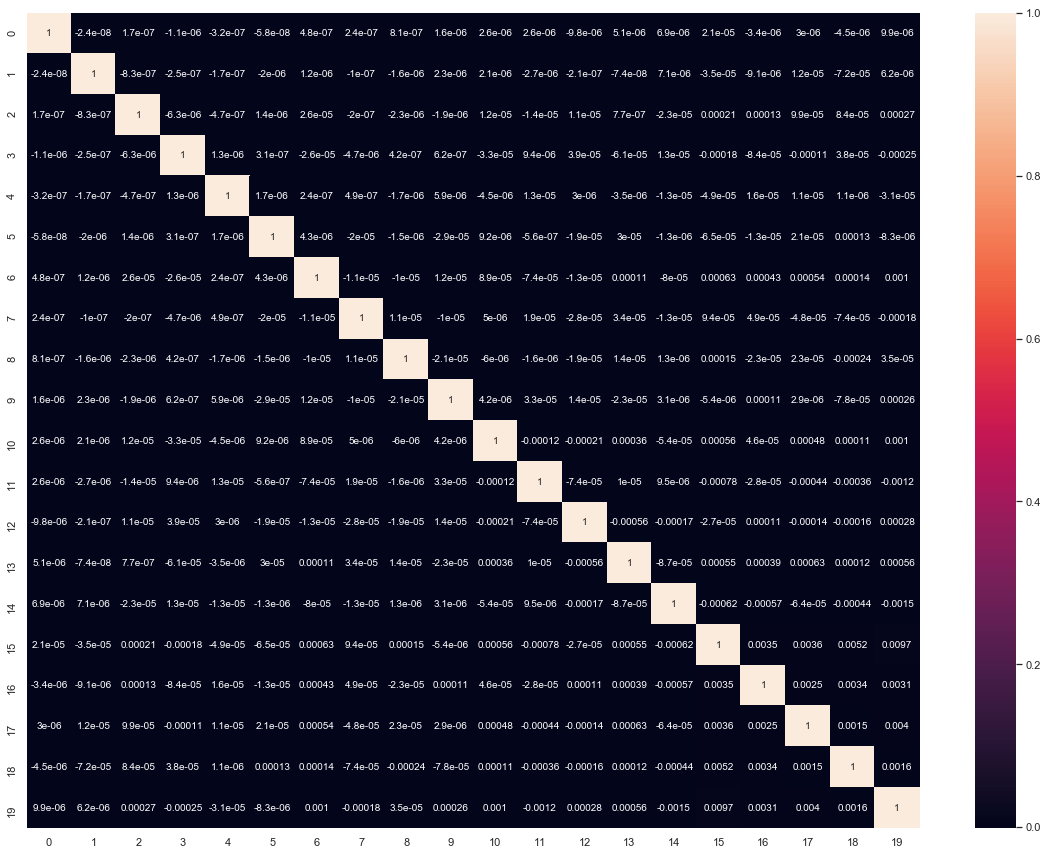

In [254]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
%matplotlib inline
plt.figure(figsize = (20,15))
sns.heatmap(corrmat,annot = True)

#We can see from below there is hardly any correlation between pca components.

In [255]:
#Converting trained pca data into data frame and inspecting size of train pca data frame
df_train_pca=pd.DataFrame(df_train_pca)
print(df_train_pca.shape)
df_train_pca.head()

(21000, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-449.526954,-926.715605,-1444.010517,1004.117839,-69.547681,389.913825,211.795391,2119.308847,639.711099,392.283187,-157.202162,0.469659,-222.678205,-104.809402,-6.599225,-257.316628,-187.928760,503.998710,-340.913557,-146.168209
1,79.921727,-919.773652,-609.211892,550.370452,51.553118,490.017579,473.327064,499.827474,179.465477,41.722743,19.925318,-214.855815,86.469256,121.306574,-87.439505,103.172507,62.249492,-31.212669,73.457354,-68.206405
2,-433.967710,-1251.438039,-543.188913,832.656432,-356.292207,865.662044,969.958690,1227.153586,277.757364,-61.839043,-36.636306,4.069046,-198.863481,-68.146859,-102.288912,34.349256,-20.382009,-132.485057,-1.791110,-105.206385
3,-1828.695040,1507.762739,-265.985634,410.727352,467.138944,1795.844861,-627.579941,-1203.621261,1923.959159,1169.706168,1294.228880,-1766.821669,110.723748,-353.670303,384.903705,-652.843355,1771.123753,-882.350748,-946.182078,38.992348
4,104.852458,-1105.820458,-285.125388,-314.180788,-15.914133,-508.690608,-389.558414,-927.693355,-136.772104,385.472155,-190.960974,150.246024,-5.260633,-105.529979,-94.517839,96.569554,-55.604105,90.459660,66.256965,23.488761


In [256]:
#Predicting the output of churn output variable on train data set.
columnList=df_train_pca.columns
y_train=y_train.reset_index()
df_train_pca['output']=y_train['churn']

In [257]:
#Inpsecting final pca data set for total no of rows available.
y_train=df_train_pca['output']
df_train_pca.drop(['output'],axis=1,inplace=True)
print(df_train_pca.shape)

(21000, 20)


In [258]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 20)

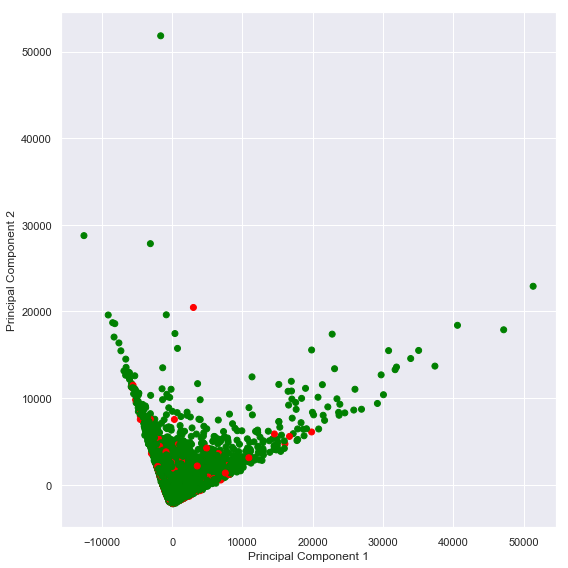

In [259]:
#Plotting two principal commponents to check the variance of data
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:][0], df_train_pca[:][1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#From below plot we can see that data points are quite clearly segggregated.

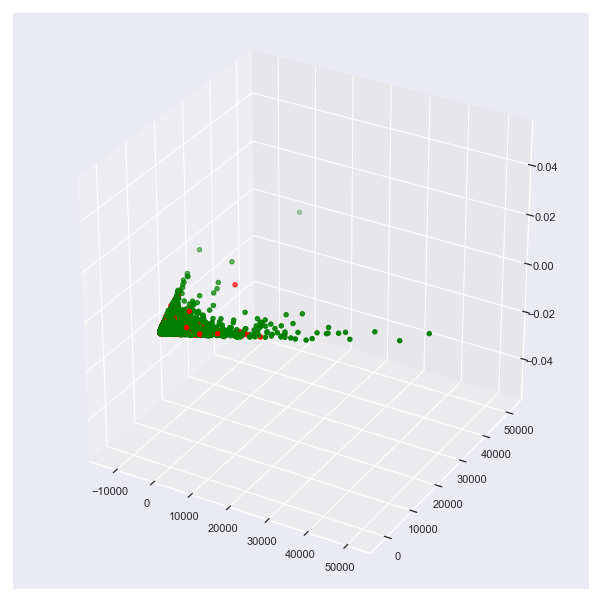

In [260]:
#Inspecting 3d view of principal components plot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter( df_train_pca.iloc[:,0], df_train_pca.iloc[:,1], c=y_train.map({0:'green',1:'red'}))
plt.show()

<h3> Trying Different Models

In [261]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

<b> Grid search function to find optimal hyperparameters

In [262]:
def ApplyGridSearchCV(model,params):
    # creating a KFold object with 5 splits 
    folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
    
    # set up grid search scheme
    # note that we are still using the 5 fold CV scheme we set up earlier
    model_cv = GridSearchCV(estimator = model, 
                            param_grid = params, 
                            scoring= 'recall', 
                            cv = folds, 
                            verbose = 1,
                           return_train_score=True)      
    model_cv.fit(df_train_pca, y_train) 
    cv_results = pd.DataFrame(model_cv.cv_results_)
    # plot of C versus train and test scores
    return cv_results

In [263]:
#Plotting ROC curve
def draw_roc_curve( y_test, pred_proba_test ):        
    fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, pred_proba_test)
    #fpr_tr, tpr_tr, thresholds = metrics.roc_curve(y_tr, pred_proba_tr[:,1])
    auc_test=metrics.roc_auc_score(y_test,pred_proba_test)
    #auc_tr=roc_auc_score(y_tr,pred_proba_tr[:,1])
    #plt.plot(fpr_tr, tpr_tr, 'b-', label='Train_ROC= %.2f'  %(auc_tr))
    plt.plot(fpr_test, tpr_test, 'r-', label='Test_ROC= %.2f'  %(auc_test))
    plt.plot(fpr_test, fpr_test, 'g-', label='x=y')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.grid(True)
    plt.title('Receiver operating characteristic example')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
    return auc_test

In [264]:
#Plotting consfusion matirx to check total positive prediction rate
def plotconfusionmatrix(y_test,pred_test):
    df=metrics.confusion_matrix(y_test, pred_test);
    labels = ['Negative', 'Positive']
    ax= plt.subplot()
    sns.heatmap(df, annot=True, ax = ax,fmt='g');
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    ax.set_title('Confusion Matrix'); 
    plt.show();
    return df

In [265]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

def getMetrics(y_test,pred_test):
#     TP = confusion[1,1] # true positive 
#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     Precision=TP/(TP+FP)
#     Recall=TP/(TP+FN)
#     print('Precision')
#     print(Precision)
#     print('Recall')
#     print(Recall)
    accuracy = accuracy_score(y_test, pred_test)
    precision = precision_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test)
    f1 = f1_score(y_test, pred_test)
    print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
    print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
    print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
    print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))

<b> 1) Logistic Regression with PCA

In [266]:
from sklearn.linear_model import LogisticRegression

params = {"C": [0.01,0.1, 1.0, 10.0, 100.0, 1000.0],"penalty":['l1','l2']}
model = LogisticRegression(class_weight='balanced')
cv_results_LR=ApplyGridSearchCV(model,params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.8s finished


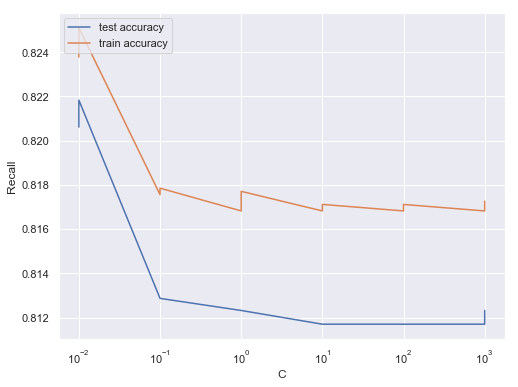

In [267]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results_LR['param_C'], cv_results_LR['mean_test_score'])
plt.plot(cv_results_LR['param_C'], cv_results_LR['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [268]:
cv_results_LR[cv_results_LR['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,1.149016,0.011096,0.002401,0.00049,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.801153,0.825688,0.84472,...,0.821834,0.014083,1,0.831845,0.829179,0.819576,0.823054,0.821887,0.825108,0.004629


In [269]:
cv_results_LR.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104301,0.017550,0.002402,0.000490,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.801153,0.822630,0.844720,...,0.820614,0.014045,2,0.828869,0.829179,0.817385,0.822320,0.821132,0.823777,0.004584
1,1.149016,0.011096,0.002401,0.000490,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.801153,0.825688,0.844720,...,0.821834,0.014083,1,0.831845,0.829179,0.819576,0.823054,0.821887,0.825108,0.004629
2,0.092465,0.003982,0.002403,0.000491,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.792507,0.816514,0.832298,...,0.812869,0.012721,3,0.821429,0.824047,0.813733,0.814244,0.814340,0.817558,0.004314
3,1.363169,0.120338,0.002401,0.000490,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.792507,0.816514,0.832298,...,0.812869,0.012721,3,0.822173,0.824047,0.814463,0.814244,0.814340,0.817853,0.004333
4,0.088063,0.007829,0.002001,0.000633,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.792507,0.816514,0.832298,...,0.812322,0.012827,5,0.820685,0.822581,0.813002,0.813510,0.814340,0.816823,0.003995


<b> For best hyperparameters we get C=0.01 and penalty as 'l2'

In [270]:
#Applying Logistic Regression
#Training the model on the train data

learner_pca = LogisticRegression(class_weight='balanced',penalty='l2',C=0.01)
model_pca = learner_pca.fit(df_train_pca,y_train)

In [271]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 20 selected principal components and logistic regression model we have achieved 87% of accuracy 

'0.87'

In [272]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)

In [273]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.775127
1,8279,1,0.561494
2,72269,0,0.080066
3,65602,0,0.334888
4,42758,1,0.701484


In [274]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.5 i.e if probability >0.5 then potential lead is likely to churn  else not

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.775127,1
1,8279,1,0.561494,1
2,72269,0,0.080066,0
3,65602,0,0.334888,0
4,42758,1,0.701484,1


In [275]:
#Importing metrics module to calculate accuracy of the final predicted values
from sklearn import metrics
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

#We have achieved 80% of accuracy using selected model.

0.7894678369070103

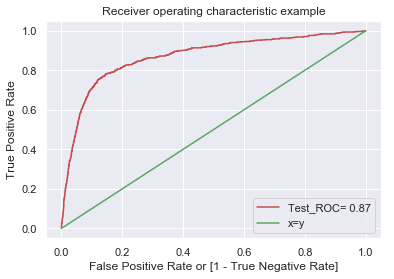

0.8694862036924818


In [276]:
auc_test=draw_roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob )
print(auc_test)

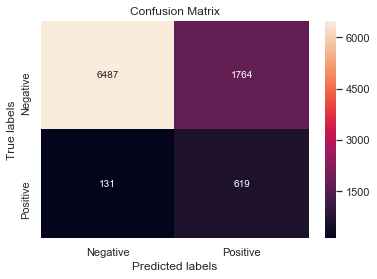

In [277]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.churn, y_pred_final.predicted )

In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn,y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.79      0.87      8251
          1       0.26      0.83      0.40       750

avg / total       0.92      0.79      0.83      9001



In [279]:
getMetrics(y_pred_final.churn,y_pred_final.predicted)

Accuracy_score: 78.95% on test dataset
precision_score: 25.98% on test dataset
recall_score: 82.53% on test dataset
f1_score: 39.51% on test dataset


### Precision Recall tradeoff

In [280]:
from sklearn.metrics import precision_recall_curve
y_pred_final.churn, y_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 8971    0
 8972    0
 8973    0
 8974    0
 8975    0
 8976    0
 8977    0
 8978    1
 8979    0
 8980    0
 8981    0
 8982    0
 8983    0
 8984    0
 8985    0
 8986    0
 8987    0
 8988    0
 8989    0
 8990    0
 8991    0
 8992    0
 8993    0
 8994    0
 8995    0
 8996    0
 8997    0
 8998    0
 8999    0
 9000    0
 Name: churn, Length: 9001, dtype: int64, 0       1
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      1
 23      0
 24      1
 25      0
 2

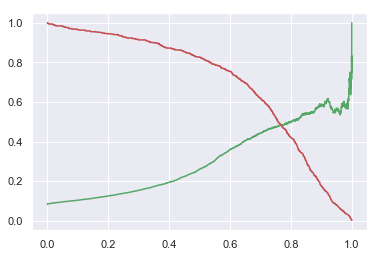

In [281]:
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Thus we're having to sacrifice precision for recall as there is no other suitable tradeoff for threshold

<b> 2) Random Forest

In [282]:
from sklearn.ensemble import RandomForestClassifier

depth=[5, 10,50, 100]
n_estimators=[100, 200]
params = {'max_depth':depth,'n_estimators':n_estimators}
model = RandomForestClassifier(class_weight='balanced')
cv_results_RF=ApplyGridSearchCV(model,params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.9min finished


In [283]:
cv_results_RF.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.894854,0.187889,0.046236,0.003197,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.711816,0.706422,0.726708,...,0.711068,0.008412,2,0.779762,0.768328,0.770636,0.778267,0.786415,0.776682,0.006528
1,5.781291,0.244314,0.097071,0.010150,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.717579,0.709480,0.742236,...,0.714906,0.015713,1,0.781250,0.780059,0.773557,0.782673,0.768302,0.777168,0.005422
2,4.615663,0.141578,0.062433,0.000806,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.567723,0.559633,0.518634,...,0.540991,0.025526,4,0.901042,0.906158,0.902849,0.886197,0.892830,0.897815,0.007283
3,8.931700,0.031848,0.121695,0.000489,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.547550,0.577982,0.524845,...,0.542838,0.022297,3,0.900298,0.909091,0.893353,0.892070,0.896604,0.898283,0.006109
4,5.383424,0.080908,0.077849,0.006643,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.106628,0.122324,0.096273,...,0.110188,0.011354,6,0.999256,1.000000,0.998539,0.998532,1.000000,0.999265,0.000655


In [284]:
cv_results_RF[cv_results_LR['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,5.781291,0.244314,0.097071,0.01015,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.717579,0.70948,0.742236,...,0.714906,0.015713,1,0.78125,0.780059,0.773557,0.782673,0.768302,0.777168,0.005422


In [285]:
learner_pca_RF = RandomForestClassifier(class_weight='balanced',max_depth=5,n_estimators=200)
model_pca_RF = learner_pca_RF.fit(df_train_pca,y_train)

In [286]:
#Making prediction on the test data
pred_probs_test = model_pca_RF.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 20 selected principal components and Random Forest model we have achieved 87% of accuracy 

'0.86'

In [287]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca_RF.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)

In [288]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.526475
1,8279,1,0.478279
2,72269,0,0.276925
3,65602,0,0.224217
4,42758,1,0.548990


In [289]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.4 i.e if probability >0.4 then potential lead is likely to churn  else not

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.526475,1
1,8279,1,0.478279,0
2,72269,0,0.276925,0
3,65602,0,0.224217,0
4,42758,1,0.548990,1


In [290]:
#Importing metrics module to calculate accuracy of the final predicted values
from sklearn import metrics
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

#We have achieved 80% of accuracy using selected model.

0.8300188867903566

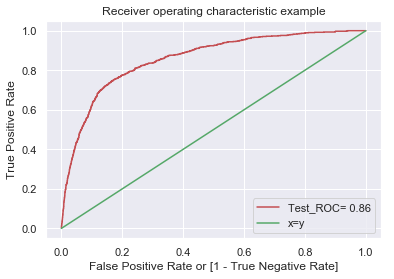

0.858117561507696


In [291]:
auc_test=draw_roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob )
print(auc_test)

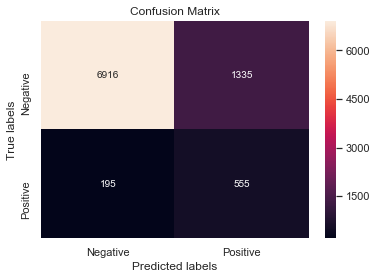

In [292]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.churn, y_pred_final.predicted )

In [293]:
print(classification_report(y_pred_final.churn,y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.97      0.84      0.90      8251
          1       0.29      0.74      0.42       750

avg / total       0.92      0.83      0.86      9001



In [294]:
getMetrics(y_pred_final.churn,y_pred_final.predicted)

Accuracy_score: 83.00% on test dataset
precision_score: 29.37% on test dataset
recall_score: 74.00% on test dataset
f1_score: 42.05% on test dataset


## Identifying the best model that explains 

**Developed two seperate model**
- Logistic regression with PCA
- Random Forest

### Model Selected: Logistic regression


**Reason for considering logistic regression model as better model**

- Accuracy(that explains the number of prediction that is correct) in case of is relatively low compared to Random forest
- recall score(positive cases that are correctly identified) in case of logistic regression (@82.5%)is better compared to Random forest 
- The driving factor used here is recall, in order to be able to identify more positive cases of churn

**Critical feature (Top 15) that have the highest contribution for churning**
1. loc_ic_mou_8
2. total_rech_num_8
3. loc_ic_t2m_mou_8
4. sachet_2g_8
5. onnet_mou_8
6. total_rech_amt_8
7. loc_og_mou_7
8. last_day_rch_amt_8
9. total_og_mou_8
10. loc_og_t2m_mou_8
11. aon
12. std_og_t2m_mou_8
13. loc_og_mou_8
14. monthly_2g_8
15. offnet_mou_8

## Stratergy to manage customer churn
- With this approach, evaluate churn rate from previous months and compare this with future month. Marketing stratergy have to be devised to add customers - more than - the number leaving
- Through this model it is possible to identify the months where the churn rate will plateau(customer added is equal to the number leaving), allowing the marketing team to dole out more promotional schemes in order to attract more customers
- Focusing on 'your own churn rate' would help develop better plans (right stratergy to grow your business), rather than developing portfolios that compete with other companies 